In [1]:
import sys
!{sys.executable} -m pip install google_images_download pytesseract opencv-python

    100% |████████████████████████████████| 174kB 3.6MB/s ta 0:00:01
    100% |████████████████████████████████| 25.4MB 625kB/s ta 0:00:011 2% |▉                               | 686kB 697kB/s eta 0:00:36    17% |█████▌                          | 4.4MB 1.6MB/s eta 0:00:14    17% |█████▊                          | 4.5MB 2.8MB/s eta 0:00:08    22% |███████▎                        | 5.8MB 5.9MB/s eta 0:00:04    31% |██████████                      | 8.0MB 2.3MB/s eta 0:00:08    45% |██████████████▊                 | 11.7MB 2.9MB/s eta 0:00:05    49% |███████████████▊                | 12.5MB 5.0MB/s eta 0:00:03    50% |████████████████▏               | 12.8MB 2.8MB/s eta 0:00:05    72% |███████████████████████▏        | 18.4MB 3.4MB/s eta 0:00:03    73% |███████████████████████▍        | 18.6MB 5.3MB/s eta 0:00:02    85% |███████████████████████████▎    | 21.7MB 2.3MB/s eta 0:00:02    88% |████████████████████████████▏   | 22.4MB 2.5MB/s eta 0:00:02    90% |█████████████████████████████   |

In [56]:
from contextlib import contextmanager
import sys, os

@contextmanager
def suppress_stdout():
    with open(os.devnull, "w") as devnull:
        old_stdout = sys.stdout
        sys.stdout = devnull
        try:  
            yield
        finally:
            sys.stdout = old_stdout
            
            
from google_images_download import google_images_download
response = google_images_download.googleimagesdownload()

def get_image(kw): 
    arguments = {"keywords": kw, "limit": 1, "format": "jpg", "size": ">2MP"}
    absolute_image_paths = response.download(arguments)
    return absolute_image_paths

import cv2 as cv
from matplotlib import pyplot as plt
import pytesseract

def grid_display(list_of_images, list_of_titles=[], no_of_columns=4, figsize=(20,3)):

    fig = plt.figure(figsize=figsize)
    column = 0
    for i in range(len(list_of_images)):
        column += 1
        #  check for end of column and create a new figure
        if column == no_of_columns+1:
            fig = plt.figure(figsize=figsize)
            column = 1
        fig.add_subplot(1, no_of_columns, column)
        
        
        
        img = cv.imread(list_of_images[i])
        rgb_img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
        
        plt.imshow(rgb_img)
        plt.axis('off')
        if len(list_of_titles) >= len(list_of_images):
            plt.title(list_of_titles[i])
            
from IPython.display import Markdown, display
def printmd(string):
    display(Markdown(string))            
            
import requests, json

def user_reccom(user_id):
    url = 'http://docker.for.mac.localhost:8080/user/{}'.format(user_id)
    r = requests.get(url)
    data = json.loads(r.content.decode())

    printmd('**Response:**')
    print(json.dumps(data, indent=4, sort_keys=True))
    return data

def random_user_reccom():
    url = 'http://docker.for.mac.localhost:8080/user/random'
    r = requests.get(url)
    data = json.loads(r.content.decode())

#     printmd('**Response:**')
#     print(json.dumps(data, indent=4, sort_keys=True))
    return data
    
def display_user_history(data):
    history_titles = [x.get("title") for x in data.get("history")][:16]
    with suppress_stdout():
        history_image_links = list(map(lambda x: next(iter(next(iter(get_image("movie - {}".format(x)).values())))), history_titles))
  
    printmd('**User {} history (top 16):**'.format(data.get("id")))
    grid_display(history_image_links, history_titles) 
    
def display_user_reccom(data):
    titles = list(map(lambda x: "{} - {}".format(x.get("title")[:25], str(x.get("score"))[:4]), data.get("scores")[:16]))
    with suppress_stdout():
        image_links = list(map(lambda x: next(iter(next(iter(get_image("movie - {}".format(x.get("title"))).values())))), data.get("scores")[:16]))
    
    printmd('**Recommendations for user {}:**'.format(data.get("id")))
    grid_display(image_links, titles) 


from IPython.core.display import Image, display
def item_reccom(item_id):
    url = 'http://docker.for.mac.localhost:8080/item/{}'.format(item_id)
    r = requests.get(url)
    data = json.loads(r.content.decode())

    printmd('**Response:**')
    print(json.dumps(data, indent=4, sort_keys=True))

    titles = list(map(lambda x: "{} - {}".format(x.get("title")[:25], str(x.get("score"))[:4]), data.get("scores")[:8]))
    with suppress_stdout():
        image_links = list(map(lambda x: next(iter(next(iter(get_image(x.get("title")).values())))), data.get("scores")[:8]))
        item_url = next(iter(next(iter(get_image(data.get("movie")).values()))))
        display(Image(item_url, width=100, unconfined=True))
    
    printmd('**Recommendations for {}:**'.format(data.get("movie")))
    grid_display(image_links, titles) 
def random_item_reccom():
    url = 'http://docker.for.mac.localhost:8080/item/random'
    r = requests.get(url)
    data = json.loads(r.content.decode())

    printmd('**Response:**')
    print(json.dumps(data, indent=4, sort_keys=True))

    titles = list(map(lambda x: "{} - {}".format(x.get("title")[:25], str(x.get("score"))[:4]), data.get("scores")[:8]))
    with suppress_stdout():
        image_links = list(map(lambda x: next(iter(next(iter(get_image(x.get("title")).values())))), data.get("scores")[:8]))
        item_url = next(iter(next(iter(get_image(data.get("movie")).values()))))
        display(Image(item_url, width=100, unconfined=True))
    
    printmd('**Recommendations for {}:**'.format(data.get("movie")))
    grid_display(image_links, titles) 


**User 128 history (top 16):**

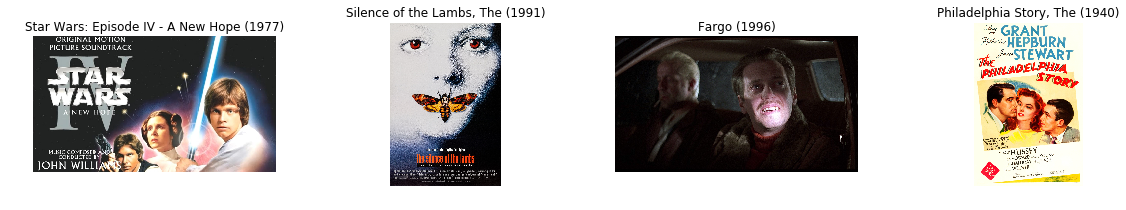

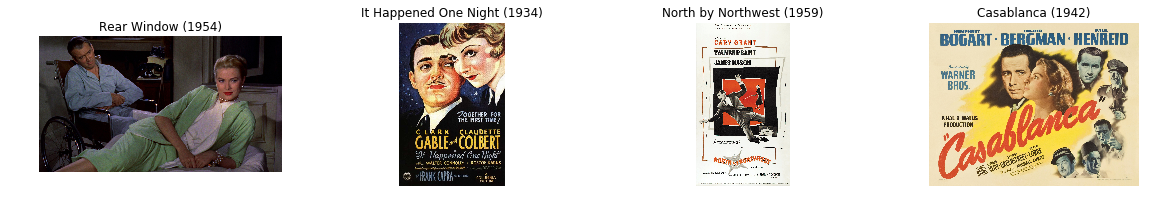

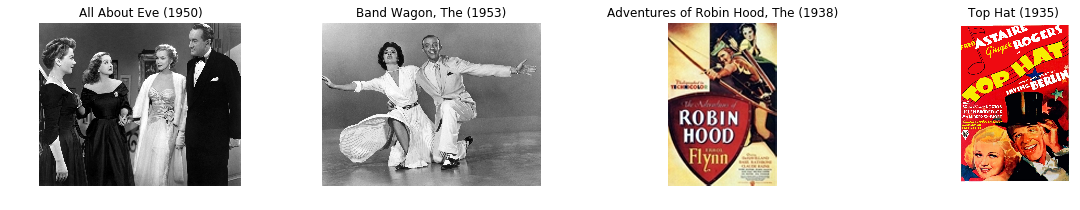

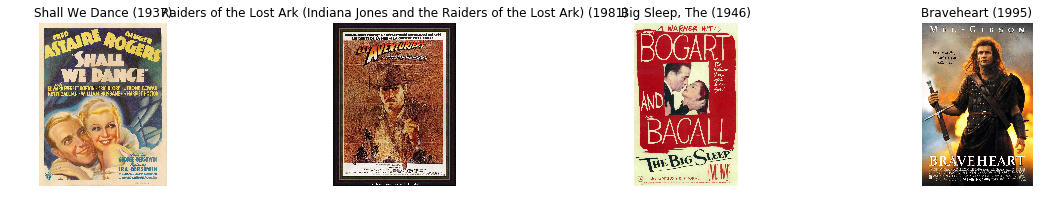

In [61]:
user_data = random_user_reccom()
display_user_history(user_data)

**Recommendations for user 128:**

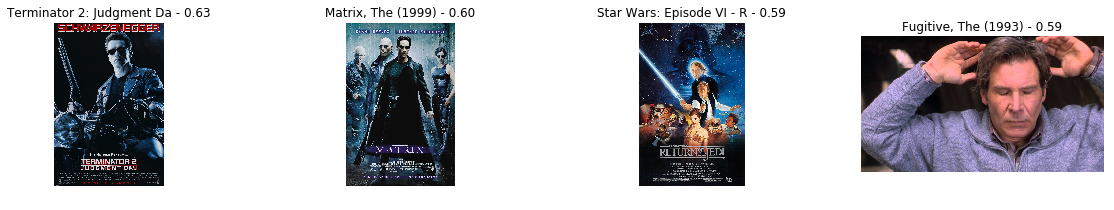

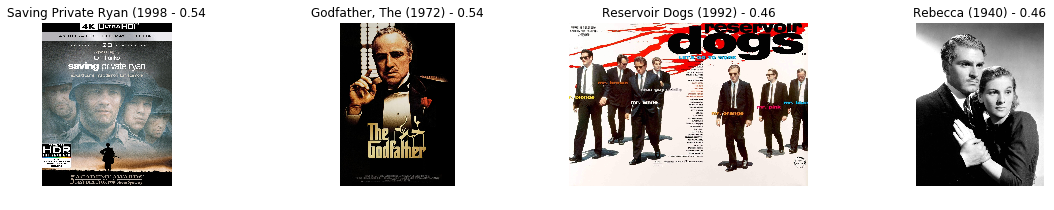

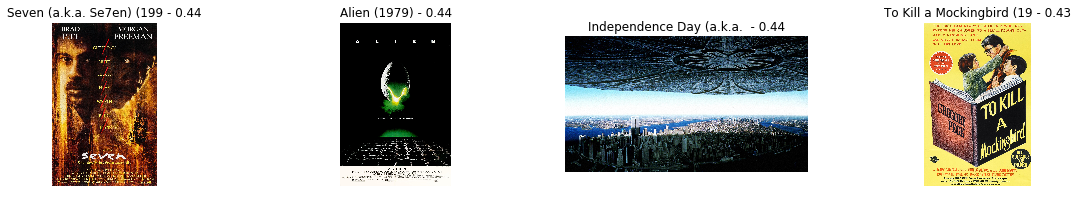

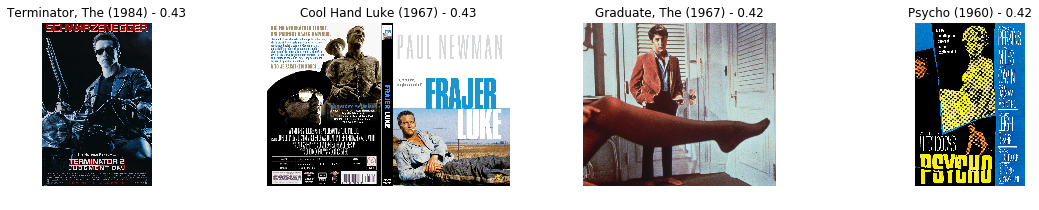

In [62]:
display_user_reccom(user_data)

**Response:**

{
    "history": [],
    "id": 99112,
    "movie": "Jack Reacher (2012)",
    "scores": [
        {
            "id": 91542,
            "score": 1.2465832233428955,
            "title": "Sherlock Holmes: A Game of Shadows (2011)"
        },
        {
            "id": 111759,
            "score": 1.1897289752960205,
            "title": "Edge of Tomorrow (2014)"
        },
        {
            "id": 109374,
            "score": 1.1861892938613892,
            "title": "Grand Budapest Hotel, The (2014)"
        },
        {
            "id": 115149,
            "score": 1.184773325920105,
            "title": "John Wick (2014)"
        },
        {
            "id": 99114,
            "score": 1.1732304096221924,
            "title": "Django Unchained (2012)"
        },
        {
            "id": 91529,
            "score": 1.126997470855713,
            "title": "Dark Knight Rises, The (2012)"
        },
        {
            "id": 122882,
            "score": 1.0956701040267944,
  

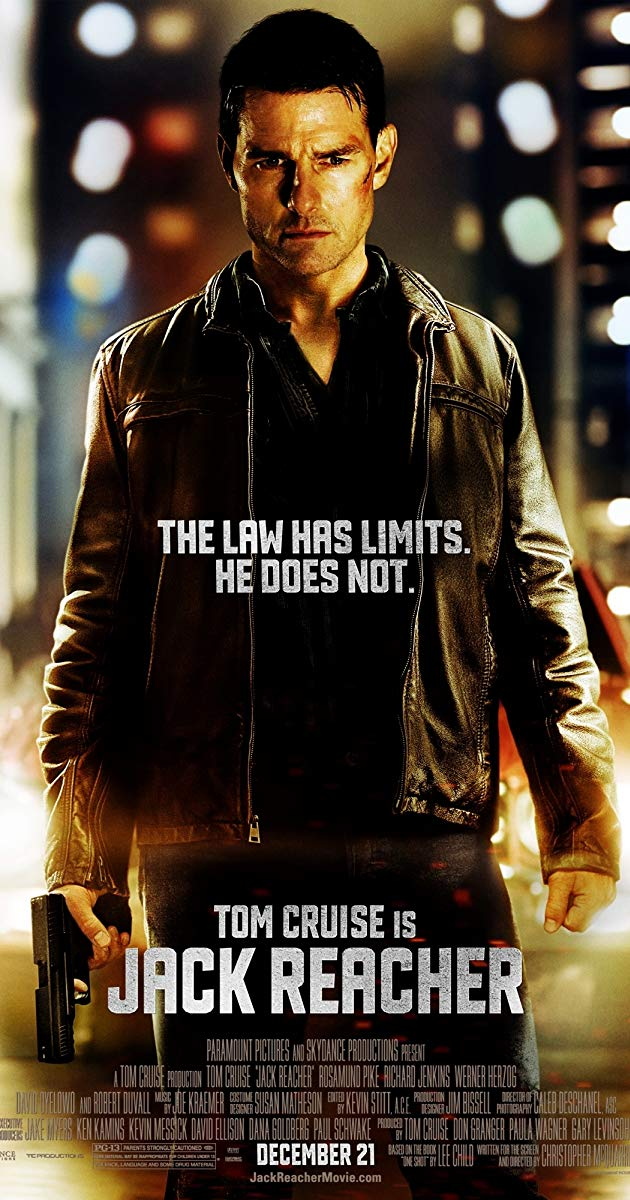

**Recommendations for Jack Reacher (2012):**

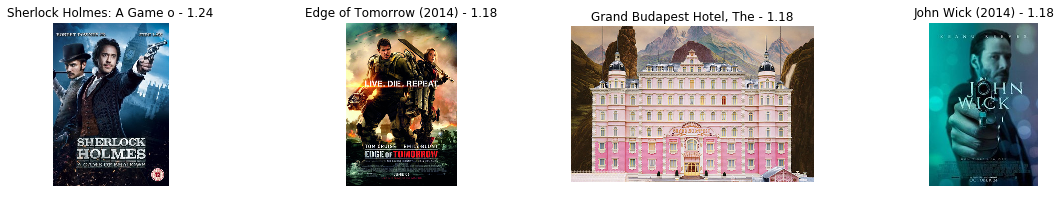

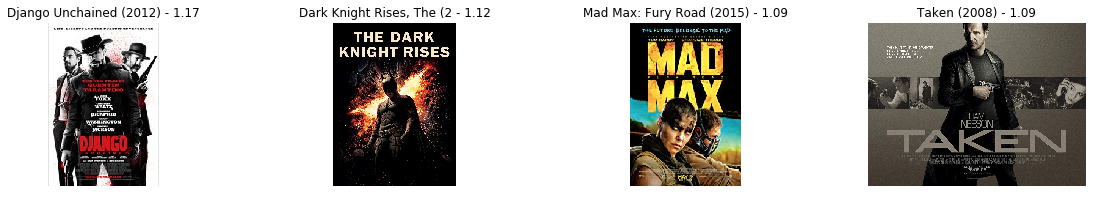

In [6]:
item_reccom(99112)

**Response:**

{
    "history": [],
    "id": 40583,
    "movie": "Syriana (2005)",
    "scores": [
        {
            "id": 39292,
            "score": 1.0587434768676758,
            "title": "Good Night, and Good Luck. (2005)"
        },
        {
            "id": 47610,
            "score": 1.0563130378723145,
            "title": "Illusionist, The (2006)"
        },
        {
            "id": 48780,
            "score": 0.9419946670532227,
            "title": "Prestige, The (2006)"
        },
        {
            "id": 6934,
            "score": 0.9087074995040894,
            "title": "Matrix Revolutions, The (2003)"
        },
        {
            "id": 33166,
            "score": 0.9080729484558105,
            "title": "Crash (2004)"
        },
        {
            "id": 7143,
            "score": 0.9070444703102112,
            "title": "Last Samurai, The (2003)"
        },
        {
            "id": 46976,
            "score": 0.9067204594612122,
            "title": "Stranger th

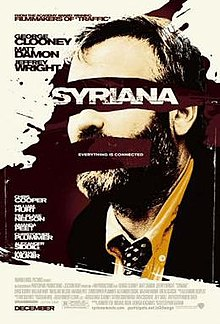

**Recommendations for Syriana (2005):**

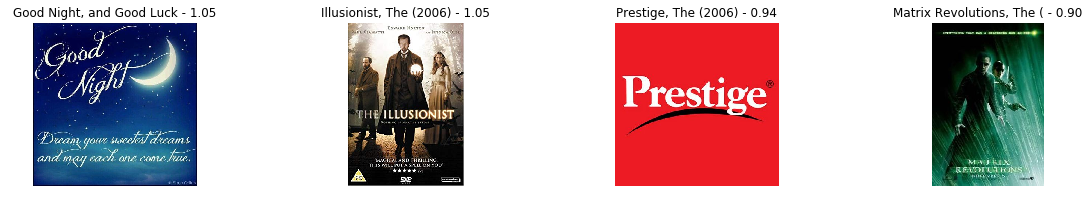

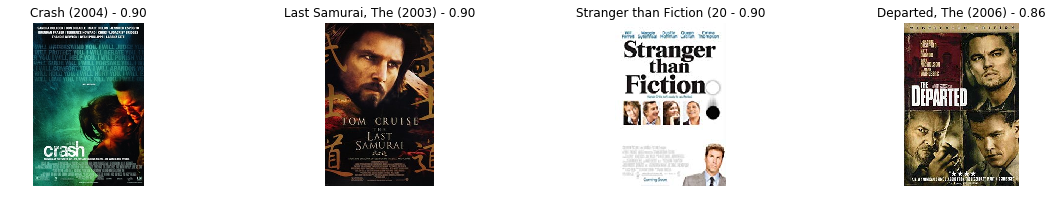

In [7]:
random_item_reccom()